[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/okada-tak/deep-learning-from-scratch/blob/master/notebooks/ch05.ipynb)
[![Open in SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/okada-tak/deep-learning-from-scratch/blob/master/notebooks/ch05.ipynb)  
# ■ch05/xxxx.py以外は追記（岡田）
# 5章 誤差逆伝播法 のまとめ
- 計算グラフを用いれば、計算過程を視覚的に把握することができる。  
- 計算グラフのノードは局所的な計算によって構成される。局所的な計算が全体の計算を構成する。  
- 計算グラフの順伝播は、通常の計算を行う。一方、計算グラフの逆伝播によって、各ノードの微分を求めることができる。  
　＃ 逆伝播でなぜ微分が求まる？
- ニューラルネットワークの構成要素をレイヤとして実装することで、勾配の計算を効率的に求めることができる（誤差逆伝播法）。  
- 数値微分と誤差逆伝播法の結果を比較することで、誤差逆伝播法の実装に誤りがないことを確認できる（勾配確認）。

## 5.2 連鎖律
逆方向の伝播では「局所的な微分」を逆方向に伝達する。

# ch05/layer_naive.py

In [ ]:
# 乗算レイヤ
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y                
        out = x * y

        return out

    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x

        return dx, dy

# 加算レイヤ
class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y

        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1

        return dx, dy

# ch05/buy_apple.py

In [ ]:
# p.138
#
# 100円 --X--X--
# 2個   --|  |
#            |
# 消費税1.1--|
#
apple = 100
apple_num = 2
tax = 1.1

mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

# backward
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dTax:", dtax)

price: 220
dApple: 2.2
dApple_num: 110
dTax: 200


# ch05/buy_apple_orange.py

In [ ]:
# p.140
#
# リンゴ
# 100円 --X--+--X--
# 2個   --|  |  |
#            |  |
# オレンジ   |  |
# 150円 --X--|  |
# 3個   --|     |
#               |
#               |
# 消費税1.1-----|
#
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)  # (1)
orange_price = mul_orange_layer.forward(orange, orange_num)  # (2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)  # (3)
price = mul_tax_layer.forward(all_price, tax)  # (4)

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)  # (4)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)  # (3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)  # (2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)  # (1)

print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dOrange:", dorange)
print("dOrange_num:", int(dorange_num))
print("dTax:", dtax)


price: 715
dApple: 2.2
dApple_num: 110
dOrange: 3.3000000000000003
dOrange_num: 165
dTax: 650


## 5.5.1 ReLUレイヤ

In [ ]:
# p.142
import numpy as np

x = np.array( [[1.0, -0.5], [-2.0, 3.0]])
print(x)

[[ 1.  -0.5]
 [-2.   3. ]]


In [ ]:
mask = (x <= 0)
print(mask)

[[False  True]
 [ True False]]


## 5.6.1 Affineレイヤ

In [ ]:
# p.147
import numpy as np

X = np.random.rand(2)
W = np.random.rand(2,3)
B = np.random.rand(3)

X.shape
W.shape
B.shape

Y = np.dot(X, W) + B

In [ ]:
# p.147のおまけ
import numpy as np

X = np.random.rand(2)
W = np.random.rand(3,2)
B = np.random.rand(3)

In [ ]:
Y = np.dot(W, X)
print(Y)

[0.78680389 0.89022726 0.80685978]


p.147  
X.shape (2,)と
W.shape (2, 3)の行列積がとれるのはなぜ？

(2,)は、2「行」n「列」を意味しない。要素数「2」というだけ。  

p.57-58の3.3.3にも説明あり。

p.148 式(5.13)の導出  
1データ版Affineレイヤの逆伝播の導出【ゼロつく1のノート(数学)】  
https://www.anarchive-beta.com/entry/2020/08/03/180000

バッチデータ版Affineレイヤの逆伝播の導出【ゼロつく1のノート(数学)】  
https://www.anarchive-beta.com/entry/2020/08/04/180000


★p.155の鳥マークの注釈  
さらっと大事なことが書いてある。  
・「ソフトマックス関数」の損失関数として「交差エントロピー誤差」を使う理由。  
$$
E=-\sum_k t_k \log{y_k}
$$
・「恒等関数」の損失関数として「2乗和誤差」を使う理由。  
$$
E=\frac{1}{2}\sum_k (y_k-t_k)^2
$$
いずれも逆伝播が$(y_1-t_1, y_2-t_2, y_3-t_3)$という、出力と教師ラベルの差という簡潔な形になるから。  
p.278～の付録A.2で交差エントロピー誤差についての導出が書かれている。  

感想：説明されれば、おお！と思うがそうなるように損失関数を設計する方法（どうやって考えつくの？）がわからない。

# ■追記（岡田）Colaboratory用
Google Colaboratoryの場合、Google Driveに  
dl-from-scratch/ch05  
というフォルダを用意し、そこにこのjupyter notebookを配置。  
(dl-from-scratchの部分は任意。)  
また、datasetフォルダとcommonフォルダを
dl-from-scratch/dataset  
dl-from-scratch/common
にコピーしておく。  

以下のセルでGoogle Driveをマウント。許可を求められるので許可する。

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ■追記（岡田）Colaboratory用
chdirする。

In [ ]:
import sys,os
os.chdir('/content/drive/My Drive/dl-from-scratch/')
os.getcwd()

'/content/drive/My Drive/dl-from-scratch'

# ch05/two_layer_net.py

p.113～ 4.5.1のTowLayerNetでは、np.dot+b, sigmoid, np.dot+b, softmaxの層構成だった。  
ここでは、sigmoidではなくReluにしている。  
また、p.153の図5-28はAffine, ReLU, Affine, ReLU, Affine, Softmaxで説明していて、1層おおい。  
（Affineはnp.dot+bと同じ。）  
↓のTwoLayerNetは、Affine, Relu, Affine, Softmaxの構成。

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict



class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

↑のコードのgradientのところ。  

lossを計算する。  
　predictでOrderedDictの順にforwardを実行。(Affine, ReLU, Affine)  
　最後にlastLayer(SoftmaxWithLoss)のforwardを実行。  
■ここから逆伝播  
lastLayer(SoftmaxWithLoss)の微分(dout)を計算し、  
以降はOrderedDictに積んだ逆順でdoutを計算していく。  
最後に１層２層の重み(W1, W2)、バイアス(b1, b2)を更新する。  
W1,W2とか書き下しているのはわかりやすくするためだと思われる。  
10層, 100層などになればループで回したりするのだろう。

# ch05/gradient_check.py

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from dataset.mnist import load_mnist

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:3.9197367159310613e-10
b1:2.135368406556894e-09
W2:5.264271249327249e-09
b2:1.4032852126283358e-07


# ch05/train_neuralnet.py

In [ ]:
import sys, os
sys.path.append(os.pardir)

import numpy as np
from dataset.mnist import load_mnist

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)


0.11601666666666667 0.1129
0.9069166666666667 0.9078
0.9223666666666667 0.9245
0.9371 0.9367
0.9459 0.9421
0.95115 0.9506
0.9552666666666667 0.9517
0.9591333333333333 0.9541
0.9629833333333333 0.9583
0.9662333333333334 0.9592
0.9692333333333333 0.9621
0.9706666666666667 0.9643
0.9731333333333333 0.9661
0.97475 0.9666
0.9759666666666666 0.9661
0.9774166666666667 0.9683
0.9787 0.9686


一応、グラフを描いてみる。

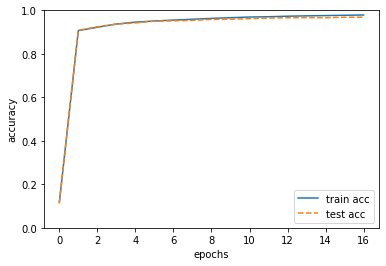

In [ ]:
import matplotlib.pyplot as plt

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()